In [1]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

# Load Data


In [2]:
tab_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/results/NBSE_tabulated.parquet')

tab = pl.read_parquet(tab_path)

In [9]:
tab.select('medications')

medications
list[str]
"[""ATORVASTATIN CALCIUM 40MG"", ""CARBIDOPA 10/LEVODOPA 100MG"", … ""THIAMINE 100MG""]"
"[""Loratadine 10mg"", ""Gabapentin 300mg""]"
"[""Amlodipine Besylate 5 mg"", ""Atorvastatin Calcium 10 mg"", … ""Multivitamin""]"
"[""Bupropion HCL – 300mg"", ""Diclofenac NA – 1%"", … ""Zoster Vaccine, Recombinant""]"
"[""ALLOPURINOL 300MG"", ""APIXABAN 5MG"", … ""TORSEMIDE 20MG""]"
…
"[""Wellbutrin 300mg"", ""Amlodipine"", … ""ZZMultivitamins""]"
"[""Cholecalciferol 50 mcg"", ""Atenolol 50 mg"", … ""Ibuprofen 80 mg""]"
null


In [10]:
df = tab.select(
    'VAC',
    'completed',
    'age',
    'sex',
    'education',
    'moca_total_score',
    'mmse_total_score',
    'diagnosis',
    'clinical_syndrome'
).sort('VAC')
df 

VAC,completed,age,sex,education,moca_total_score,mmse_total_score,diagnosis,clinical_syndrome
i64,date,i64,str,i64,i64,i64,str,str
371,null,81,"""male""",12,null,26,"""Very Mild Dementia""","""Alzheimer's disease"""
375,null,74,"""male""",18,null,28,"""Mild Cognitive Impairment (MCI…","""frontal amnestic pattern of me…"
376,null,81,"""male""",13,null,25,"""Very Mild Dementia""","""Alzheimer's disease"""
382,null,73,"""male""",14,null,29,"""Mild Cognitive Impairment (MCI…","""multi-domain, amnestic mild co…"
393,2017-06-02,63,"""male""",14,null,26,"""Mild Cognitive Impairment (MCI…","""amnestic mci"""
…,…,…,…,…,…,…,…,…
2518,2025-02-21,78,"""male""",14,22,27,"""Mild Cognitive Impairment (MCI…","""progressive amnestic dysfuncti…"
2519,2025-02-21,76,"""male""",16,20,23,"""Very Mild Dementia""","""progressive amnestic dysfuncti…"
2522,2025-02-27,81,"""male""",9,17,null,"""Mild Cognitive Impairment (MCI…","""progressive amnestic dysfuncti…"


In [11]:
acb_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/data/german_acb_scale_rxnorm.parquet')
acb_drugs = pl.read_parquet(acb_path)
acb_drugs.sample(3)

drug,acb_score,standard_name
str,i64,str
"""Entacapone""",1,"""entacapone"""
"""Maprotiline""",2,"""maprotiline"""
"""Vancomycin""",1,"""vancomycin"""


In [12]:
meds_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/results/medications_tabulated.parquet')
meds = pl.read_parquet(meds_path).unique(subset=('VAC','standard_ingredient'))
meds.sample()

VAC,medication,standard_ingredient
i64,str,str
1714,"""Bupropion hcl 150mg""","""bupropion"""


In [13]:
acb_results = meds.join(acb_drugs,left_on='standard_ingredient',right_on='standard_name',how='left').drop('drug').group_by('VAC').agg(
    pl.col('acb_score').sum().alias('acb_total_score'),
    (pl.col('acb_score') > 0).cast(pl.Int64).sum().alias('acb_meds_num'),
    pl.col('standard_ingredient').count().alias('ingredient_count')
)

In [100]:
# Just to check that we're doing the right thing
# with pl.Config(tbl_rows=20):
#     display(meds.join(acb_drugs,left_on='standard_ingredient',right_on='standard_name',how='left').drop('drug').with_columns(
#         pl.col('acb_score').sum().over('VAC').alias('acb_total_score'),
#         (pl.col('acb_score') > 0).cast(pl.Int64).sum().over('VAC').alias('acb_meds_num')
#     ))


In [14]:
df_with_acb = df.join(acb_results, on='VAC',how='left').with_columns(
    (pl.col('acb_total_score') > 0).alias('has_acb')
)

In [16]:
df_with_acb.select(pl.col('age').hist(include_category=True)).unnest('age')

category,count
cat,u32
"""[38.0, 43.9]""",4
"""(43.9, 49.8]""",5
"""(49.8, 55.7]""",16
"""(55.7, 61.6]""",76
"""(61.6, 67.5]""",227
"""(67.5, 73.4]""",445
"""(73.4, 79.3]""",607
"""(79.3, 85.2]""",310
"""(85.2, 91.1]""",135


In [17]:
from datetime import date

<Axes: xlabel='completed', ylabel='count'>

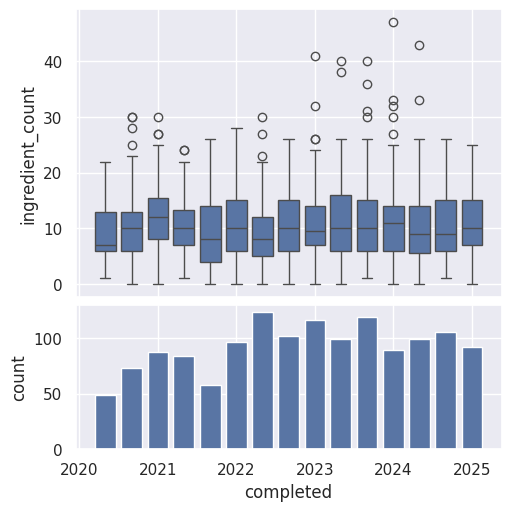

In [18]:
_df = df_with_acb.with_columns(
    pl.col('completed').dt.round(every='4mo')
).filter(
    (pl.col('completed') > date(2020,1,1)) &
    (pl.col('completed') < date(2025,5,1))
).drop_nulls('completed')

fig,ax = plt.subplots(2,1,figsize=(5,5),sharex=True,height_ratios=[2,1],layout='constrained')


sns.boxplot(
    _df.to_pandas(),
    x='completed',
    y='ingredient_count',
    # linestyles='none',
    native_scale=True,
    # estimator='mean',
    # errorbar='ci',
    # cut=0,
    ax=ax[0],
    # split=True,
    # inner=None,
    # bw_adjust=0.3
)

sns.countplot(
    _df.to_pandas(),
    x='completed',
    ax=ax[1],
    native_scale=True
)
# fig.savefig('../figures/num_meds_with_time_box.png')

<Axes: xlabel='completed', ylabel='count'>

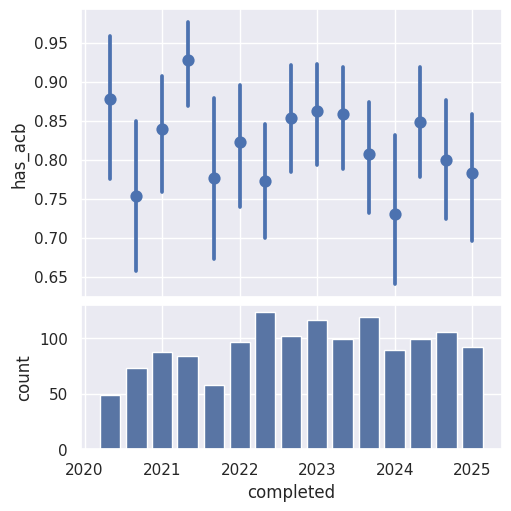

In [20]:
_df = df_with_acb.with_columns(
    pl.col('completed').dt.round(every='4mo')
).filter(
    (pl.col('completed') > date(2020,1,1)) &
    (pl.col('completed') < date(2025,5,1))
).drop_nulls('completed')

fig,ax = plt.subplots(2,1,figsize=(5,5),sharex=True,height_ratios=[2,1],layout='constrained')


sns.pointplot(
    _df.to_pandas(),
    x='completed',
    y='has_acb',
    linestyles='none',
    native_scale=True,
    estimator='mean',
    errorbar='ci',
    ax=ax[0]
)

sns.countplot(
    _df.to_pandas(),
    x='completed',
    ax=ax[1],
    native_scale=True
)

# fig.savefig('../figures/acb_fraction_with_time.png')

Text(0.5, 0.98, 'Only patients with ACB>0')

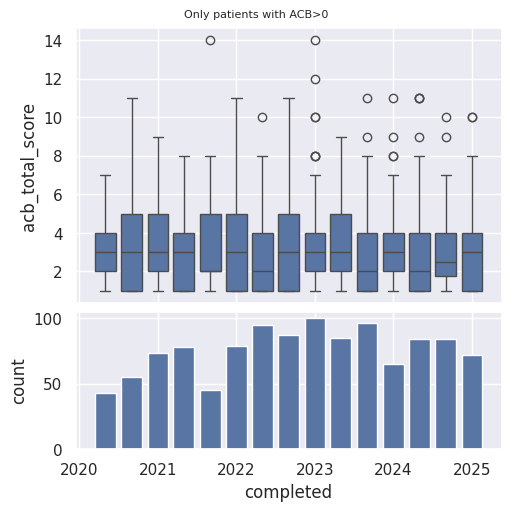

In [21]:
_df = df_with_acb.with_columns(
    pl.col('completed').dt.round(every='4mo')
).filter(
    (pl.col('completed') > date(2020,1,1)) &
    (pl.col('completed') < date(2025,5,1))
).drop_nulls('completed').filter(
    pl.col('has_acb')
)

fig,ax = plt.subplots(2,1,figsize=(5,5),sharex=True,height_ratios=[2,1],layout='constrained')


sns.boxplot(
    _df.to_pandas(),
    x='completed',
    y='acb_total_score',
    native_scale=True,
    ax=ax[0],
)


sns.countplot(
    _df.to_pandas(),
    x='completed',
    ax=ax[1],
    native_scale=True
)

fig.suptitle('Only patients with ACB>0',size=8)

# fig.savefig('../figures/acb_score_with_time.png')

In [22]:
df_with_acb.filter(
    pl.col('acb_meds_num') > 8
)

VAC,completed,age,sex,education,moca_total_score,mmse_total_score,diagnosis,clinical_syndrome,acb_total_score,acb_meds_num,ingredient_count,has_acb
i64,date,i64,str,i64,i64,i64,str,str,i64,i64,u32,bool
1638,2022-12-16,64,"""male""",14,15,null,"""Mild Cognitive Impairment (MCI…","""progressive amnestic dysfuncti…",12,9,24,true
1710,2022-12-13,69,"""male""",16,14,null,"""Mild Cognitive Impairment (MCI…","""progressive amnestic dysfuncti…",14,10,41,true
2078,2023-12-21,70,"""male""",14,20,25,"""Mild Cognitive Impairment""","""progressive amnestic dysfuncti…",11,10,33,true
2209,2024-06-05,71,"""female""",12,25,28,"""Subjective Cognitive Decline (…",null,11,9,23,true


In [96]:
meds.filter(
    pl.col('VAC') == 1710
)

VAC,medication,standard_ingredient
i64,str,str
1710,"""Absorbase""","""menthol"""
1710,"""Albuterol 90mcg""","""albuterol"""
1710,"""Albuterol 0.083%""","""albuterol"""
1710,"""Amitriptyline HCL 25mg""","""amitriptyline"""
1710,"""Artificial Saliva""","""Dunaliella salina extract"""
…,…,…
1710,"""Sodium Chloride 0.065%""","""potassium chloride"""
1710,"""Sulfamethoxazole/Trimethoprim …","""sulfamethoxazole"""
1710,"""Sulfamethoxazole/Trimethoprim …","""trimethoprim"""


<Axes: xlabel='completed', ylabel='acb_meds_num'>

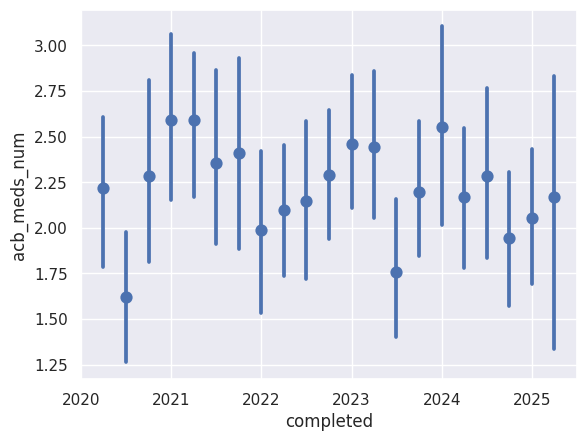

In [ ]:
_df = df_with_acb.with_columns(
    pl.col('completed').dt.round(every='3mo')
).filter(
    pl.col('completed') > date(2020,1,1)
).drop_nulls('completed')

sns.pointplot(
    _df.to_pandas(),
    x='completed',
    y='acb_meds_num',
    native_scale=True,
    linestyles='none',
)

In [71]:
df_with_acb

VAC,completed,age,sex,education,moca_total_score,mmse_total_score,diagnosis,specific_clinical_syndrome,acb_total_score,acb_meds_num,ingredient_count
i64,date,i64,str,i64,i64,i64,str,str,i64,i64,u32
371,null,81,"""male""",12,null,26,"""Dementia (very mild)""","""Alzheimer’s disease""",0,0,0
375,null,74,"""male""",18,null,28,"""Mild Cognitive Impairment (MCI…","""Frontal amnestic pattern of me…",0,0,0
376,null,81,"""male""",13,null,25,"""Dementia (very mild)""","""Alzheimer’s disease""",0,0,0
382,null,73,"""male""",14,null,29,"""Mild Cognitive Impairment (MCI…","""Multi-domain, amnestic mild co…",0,0,0
393,2017-06-02,63,"""male""",14,null,26,"""Mild Cognitive Impairment (MCI…","""Amnestic mild cognitive impair…",0,0,0
…,…,…,…,…,…,…,…,…,…,…,…
2518,2025-02-21,78,"""male""",14,22,27,"""Mild Cognitive Impairment (MCI…","""Progressive amnestic dysfuncti…",4,2,15
2519,2025-02-21,76,"""male""",16,20,23,"""Very mild dementia""","""Progressive amnestic dysfuncti…",3,3,10
2522,2025-02-27,81,"""male""",9,17,null,"""Mild Cognitive Impairment (MCI…","""Progressive amnestic dysfuncti…",4,3,11


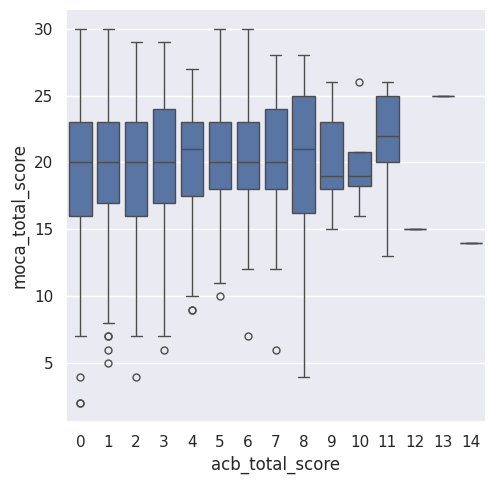

In [120]:
g = sns.catplot(
    df_with_acb,
    x='acb_total_score',
    y='moca_total_score',
    kind='box',
)

In [121]:
g.savefig('acb_moca.png')

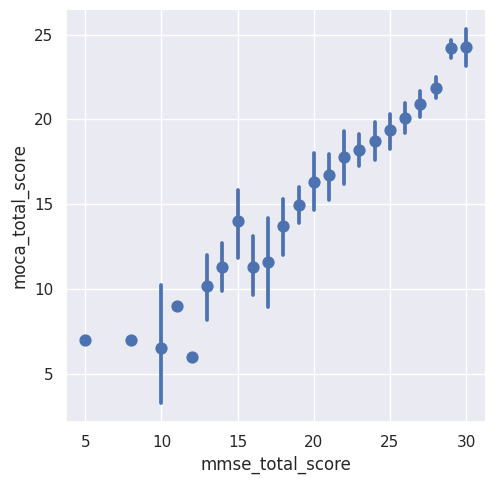

In [67]:
sns.catplot(
    df_with_acb.filter(pl.col('VAC') > 1000),
    x='mmse_total_score',
    y='moca_total_score',
    kind='point',
    native_scale=True,
    linestyles='none'
)

In [ ]:
acb_results.with_columns(
    (pl.col('acb_total_score') > 0).cast(pl.Int64).alias('has_acb')
).select(pl.col('has_acb').value_counts(normalize=True)).unnest('has_acb')

has_acb,proportion
i64,f64
1,0.684777
0,0.315223


In [46]:
acb_results

VAC,acb_total_score,acb_meds_num,ingredient_count
i64,i64,i64,u32
1971,4,4,41
1575,4,4,10
1581,4,3,7
1051,4,2,26
2105,2,2,3
…,…,…,…
1569,1,1,6
1700,1,1,9
1045,3,3,14


<Axes: xlabel='acb_total_score', ylabel='count'>

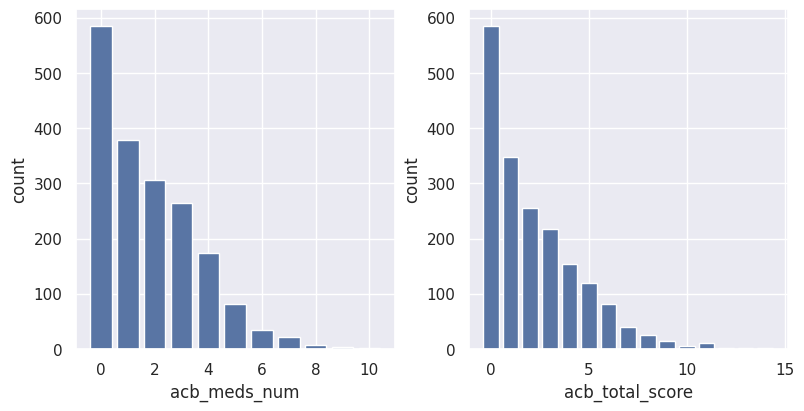

In [152]:
fig,ax = plt.subplots(1,2,figsize=(8,4),layout='constrained')


sns.countplot(
    acb_results,
    x='acb_meds_num',
    ax=ax[0],
    native_scale=True
    )

sns.countplot(
    acb_results,
    x='acb_total_score',
    ax=ax[1],
    native_scale=True
)

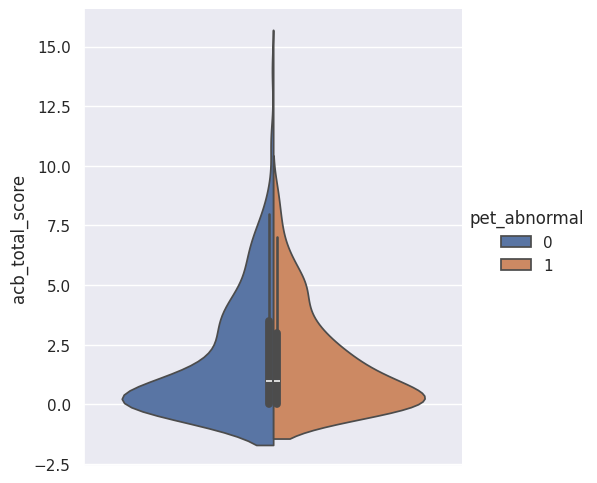

In [178]:
_df = acb_results.join(apet, on='VAC').filter(
    pl.col('pet_abnormal').is_not_null()
)

g = sns.catplot(
    _df,
    hue='pet_abnormal',
    y='acb_total_score',
    kind='violin',
    split=True
)


g.savefig('pet_vs_acb.png')